In [4]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score

In [39]:
data = pd.read_csv('real&fake.csv')
data.head(5)

,title,text,subject,Class
0,budget fight looms u republicans flip fiscal s...,government shutdown defense “ discretionary ” ...,politicsNews,Real
1,pentagon monday u military accept transgender ...,federal law banning gender protect transgender...,politicsNews,Real
2,senior u job republican senator let mr mueller,seemed election trump administration allies ja...,politicsNews,Real
3,fbi russia probe helped nyt australian diploma...,conversation election special counsel led papa...,politicsNews,Real
4,charge much trump wants postal service amazon ...,"46 percent stock prices n ), postal service de...",politicsNews,Real


In [41]:
data.isnull().sum()
data = data.dropna()

In [42]:
data.count()

title      44266
text       44266
subject    44266
Class      44266
dtype: int64

In [48]:
count = CountVectorizer()
label = data['Class']

X_train, X_test, y_train, y_test = train_test_split(data['title'], label,test_size=0.3,random_state=53)

x_train = count.fit_transform(X_train.values)
x_test = count.transform(X_test.values)
print(x_train.shape)

(30986, 18553)


In [89]:
#Multinomial Naive Bayes

from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB

nb_classifier1 = MultinomialNB()
nb_classifier1.fit(x_train, y_train)

pred = nb_classifier1.predict(x_test)

print("                      Naive Bayes\n")
print(classification_report(y_test, pred))
print("Accuracy: ", round(accuracy_score(pred, y_test),2))

                      Naive Bayes

              precision    recall  f1-score   support

        Fake       0.93      0.96      0.94      6741
        Real       0.95      0.93      0.94      6539

    accuracy                           0.94     13280
   macro avg       0.94      0.94      0.94     13280
weighted avg       0.94      0.94      0.94     13280

Accuracy:  0.94


The highest accuracy is obtain when using K = 291


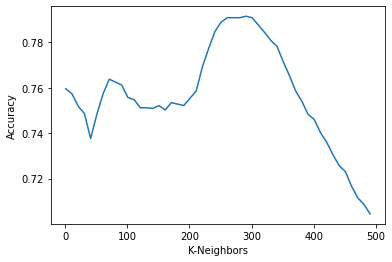

In [71]:
#Best Accuracy for K-NN

import numpy as np
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

pure=int(x_train.shape[0]*0.9)
rng=np.random.RandomState(0)
idx_list=np.arange(0, x_train.shape[0])
rng.shuffle(idx_list)
train_idx=idx_list[0:pure]
val_idx=idx_list[pure:]
n_list=np.arange(1, 500, 10)
param_grid = {'n_neighbors':n_list}
model=KNeighborsClassifier()
gs = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=[(train_idx, val_idx)])
gs.fit(x_train, y_train)
acc_val_list=gs.cv_results_['mean_test_score']
fig, ax = plt.subplots()
ax.plot(n_list, acc_val_list)
ax.set_xlabel('K-Neighbors')
ax.set_ylabel('Accuracy')
print('The highest accuracy is obtain when using K = {}'.format(n_list[np.argmax(acc_val_list)]))

In [90]:
#K Nearest Neighbors

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 291)
knn.fit(x_train, y_train)

pred = knn.predict(x_test)
print("                      K-Nearest Neighbors\n")
print(classification_report(y_test, pred))
print("Accuracy: ", round(accuracy_score(pred, y_test),2))

                      K-Nearest Neighbors

              precision    recall  f1-score   support

        Fake       0.85      0.73      0.79      6741
        Real       0.76      0.87      0.81      6539

    accuracy                           0.80     13280
   macro avg       0.81      0.80      0.80     13280
weighted avg       0.81      0.80      0.80     13280

Accuracy:  0.8


In [92]:
#Linear SVC

from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

clf = LinearSVC(max_iter=100, C=1.0)
clf.fit(x_train, y_train)

pred = clf.predict(x_test)
print("                Linear Suport Vector Machine\n")
print(classification_report(y_test, pred))
print("Accuracy: ", round(accuracy_score(pred, y_test),2))

                Linear Suport Vector Machine

              precision    recall  f1-score   support

        Fake       0.95      0.94      0.95      6741
        Real       0.94      0.95      0.95      6539

    accuracy                           0.95     13280
   macro avg       0.95      0.95      0.95     13280
weighted avg       0.95      0.95      0.95     13280

Accuracy:  0.95


In [93]:
#Decision Tree

from sklearn.tree import export_graphviz, DecisionTreeClassifier, DecisionTreeRegressor

dtree = DecisionTreeClassifier(criterion='entropy', max_depth=5)
clf = dtree.fit(x_train, y_train)

pred = clf.predict(x_test)

print("                      Decision Tree\n")
print(classification_report(y_test, pred))
print("Accuracy: ", round(accuracy_score(pred, y_test),2))

                      Decision Tree

              precision    recall  f1-score   support

        Fake       0.99      0.48      0.64      6741
        Real       0.65      1.00      0.79      6539

    accuracy                           0.73     13280
   macro avg       0.82      0.74      0.71     13280
weighted avg       0.82      0.73      0.71     13280

Accuracy:  0.73


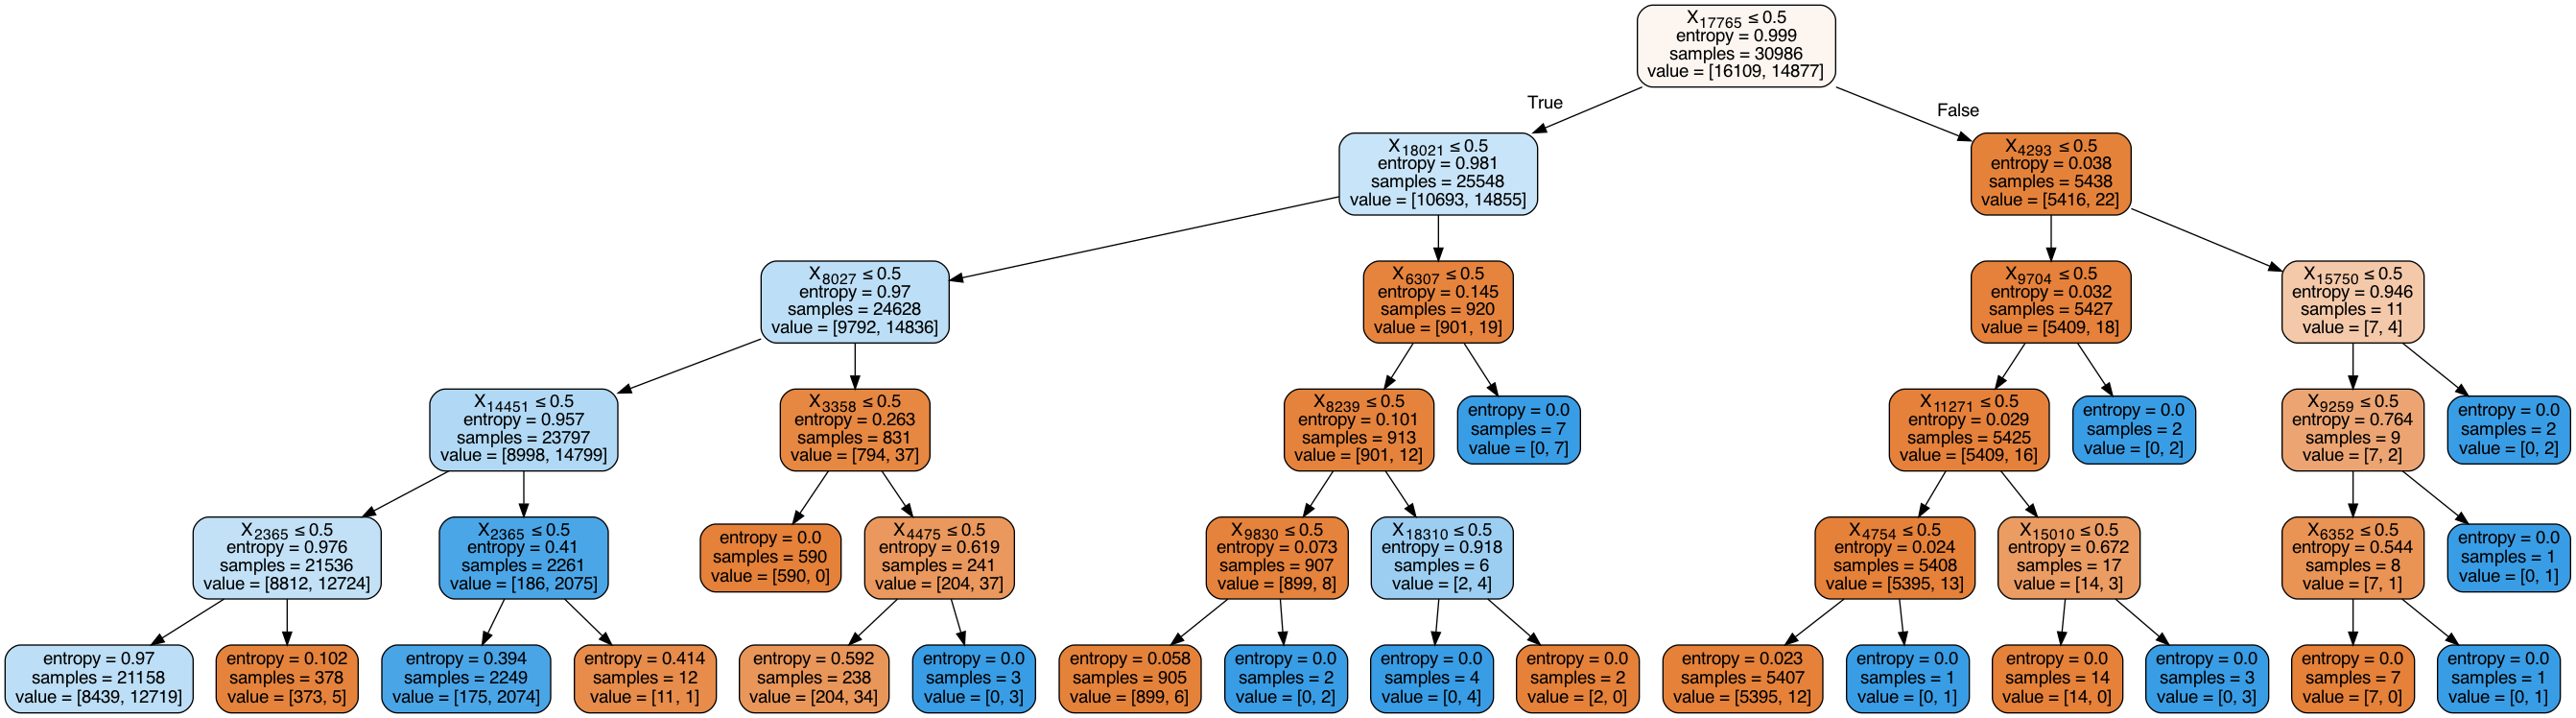

In [94]:
from sklearn import tree
import pydotplus 
from IPython.display import Image

VisualTree = tree.export_graphviz(clf,
                filled=True, rounded=True,
                special_characters=True)
Graph = pydotplus.graph_from_dot_data(VisualTree)
Image(Graph.create_png(),)

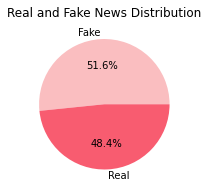

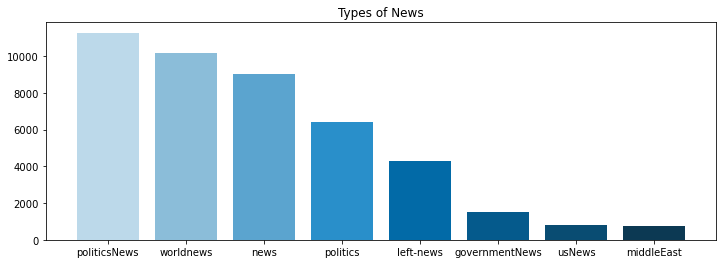

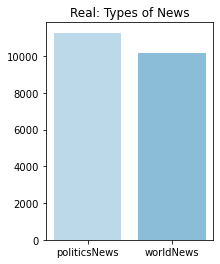

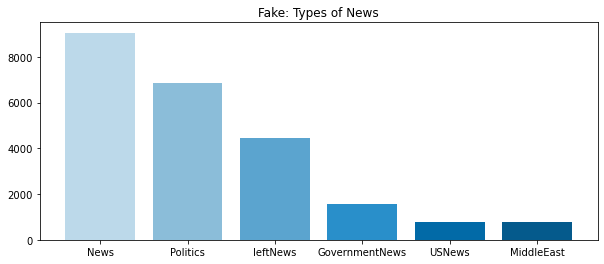

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(9,3))
plt.pie(data["Class"].value_counts().values, labels=['Fake', 'Real'], colors=('#FABEC0', '#F85C70'),autopct='%1.1f%%')
plt.title('Real and Fake News Distribution')
plt.show()

name = ['politicsNews', 'worldnews', 'news', 'politics', 'left-news', 'governmentNews', 'usNews', 'middleEast']
plt.figure(figsize=(12,4))
plt.bar(name, data['subject'].value_counts().values, color=('#bcd9ea','#8bbdd9', '#5ba4cf', '#298fca', '#026aa7', '#055a8c', '#094c72', '#0c3953'))
plt.title("Types of News")
plt.show()

true= pd.read_csv('true.csv')
fake= pd.read_csv('fake.csv')

name = ['politicsNews', 'worldNews']
plt.figure(figsize=(3,4))
plt.bar(name, true['subject'].value_counts().values, color=('#bcd9ea','#8bbdd9', '#5ba4cf', '#298fca', '#026aa7', '#055a8c', '#094c72', '#0c3953'))
plt.title("Real: Types of News")
plt.show()

name= ['News', 'Politics', 'leftNews', 'GovernmentNews', 'USNews', 'MiddleEast']
plt.figure(figsize=(10,4))
plt.bar(name, fake['subject'].value_counts().values, color=('#bcd9ea','#8bbdd9', '#5ba4cf', '#298fca', '#026aa7', '#055a8c', '#094c72', '#0c3953'))
plt.title("Fake: Types of News")
plt.show()

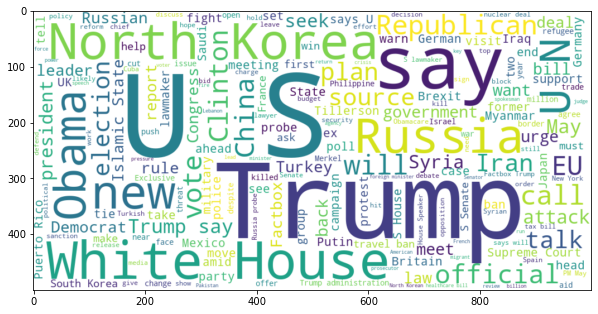

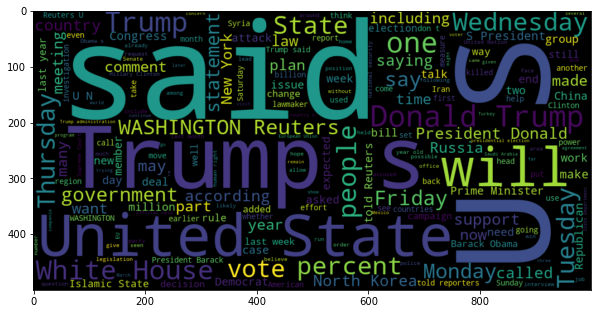

In [80]:
from wordcloud import WordCloud,STOPWORDS

plt.figure(figsize = (10,10))
wc = WordCloud(max_words = 200 , width = 1000 , height = 500 , stopwords = STOPWORDS, background_color="white").generate(" ".join(true['title']))
plt.imshow(wc , interpolation = 'bilinear')

plt.figure(figsize = (10,10))
wc = WordCloud(max_words = 200 , width = 1000 , height = 500 , stopwords = STOPWORDS).generate(" ".join(true['text']))
plt.imshow(wc , interpolation = 'bilinear')

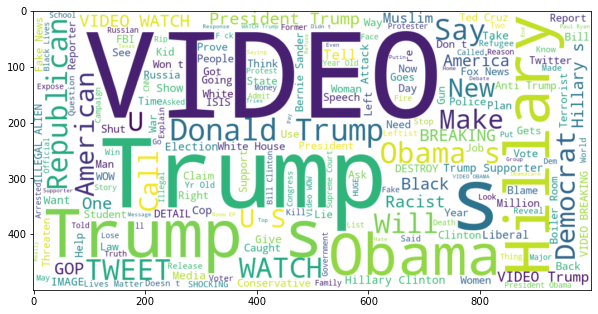

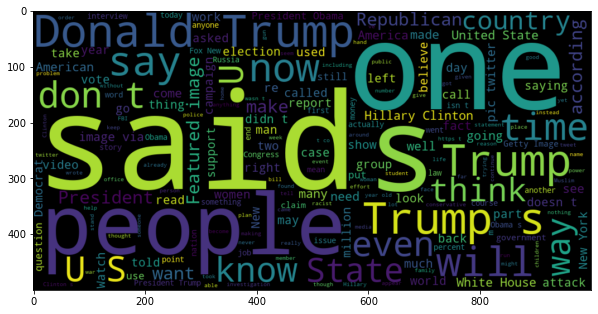

In [82]:
plt.figure(figsize = (10,10))
wc = WordCloud(max_words = 200 , width = 1000 , height = 500 , stopwords = STOPWORDS, background_color="white").generate(" ".join(fake['title']))
plt.imshow(wc , interpolation = 'bilinear')

plt.figure(figsize = (10,10))
wc = WordCloud(max_words = 200 , width = 1000 , height = 500 , stopwords = STOPWORDS).generate(" ".join(fake['text']))
plt.imshow(wc , interpolation = 'bilinear')